In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("Random_leak_data_by_python_new.xlsx")
df.head()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
0,2024-09-11 01:07:51.672,39.929400,10.621079,18424.053113,1.027891,22.903695,91.492707,0
1,2024-09-11 01:08:51.672,28.772791,12.583485,19349.045753,1.062183,23.669735,90.480759,0
2,2024-09-11 01:09:51.672,40.683585,10.373292,16836.128391,1.198044,22.882568,91.501099,0
3,2024-09-11 01:10:51.672,30.132450,7.311777,13157.137992,1.147510,23.649962,91.316517,1
4,2024-09-11 01:11:51.672,43.363561,22.374388,13531.753162,1.021209,23.724924,90.813242,0


In [7]:
df.shape    # 8 columns and 1000 rows

(1000, 8)

In [9]:
df.describe()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-09-11 09:27:21.672000,32.279212,15.098940,16985.253316,0.999864,23.080595,91.076086,0.258000
min,2024-09-11 01:07:51.672000,20.002799,5.000084,12008.290348,0.800623,22.344266,90.400441,0.000000
25%,2024-09-11 05:17:36.672000,25.645795,10.018130,14561.355364,0.900608,22.748368,90.717697,0.000000
50%,2024-09-11 09:27:21.672000,31.921272,15.172110,16807.068037,0.998330,23.083174,91.064813,0.000000
75%,2024-09-11 13:37:06.672000,38.703124,19.982058,19426.435195,1.104858,23.424764,91.415869,1.000000
max,2024-09-11 17:46:51.672000,44.986369,24.997440,21993.122800,1.199776,23.777052,91.814580,1.000000
std,NaN,7.381763,5.756182,2891.156689,0.117223,0.401001,0.404323,0.437753


In [11]:
# Split the data into features (X) and target variable (y)

X = df.drop(columns=['Timestamp', 'Latitude', 'Longitude', 'Leak Condition'])
y = df['Leak Condition']

In [13]:
X.head()

,Pressure,Temperature,Frequency,Amplitude
0,39.929400,10.621079,18424.053113,1.027891
1,28.772791,12.583485,19349.045753,1.062183
2,40.683585,10.373292,16836.128391,1.198044
3,30.132450,7.311777,13157.137992,1.147510
4,43.363561,22.374388,13531.753162,1.021209


In [15]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Leak Condition, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

# Importing train_test_split function from sklearn library
# Splitting the dataset into training and testing sets with 80% for training and 20% for testing

In [19]:
X_train.shape

(800, 4)

In [21]:
X_test.shape

(200, 4)

In [23]:
from sklearn.preprocessing import MinMaxScaler                    # Importing MinMaxScaler from sklearn.preprocessing
scaler = MinMaxScaler()                                           # Initializing MinMaxScaler object
X_train_scaled = scaler.fit_transform(X_train)                    # Scaling the training features using Min-Max scaling
X_test_scaled = scaler.fit_transform(X_test)                      # Scaling the testing features using Min-Max scaling

In [25]:
X_train_scaled

array([[0.86644992, 0.4360012 , 0.18844217, 0.59121496],
       [0.84313926, 0.09260726, 0.65462262, 0.0623835 ],
       [0.63440473, 0.68328105, 0.71504437, 0.13877925],
       ...,
       [0.39827878, 0.62740301, 0.87364972, 0.44882977],
       [0.46059965, 0.58472611, 0.28863769, 0.12982962],
       [0.00220662, 0.44523584, 0.60390752, 0.60050745]])

# Train a Support Vector Machine Model

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=1)

In [29]:
# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=1)

In [31]:
# Predict on test data
y_pred_svm = svm_model.predict(X_test_scaled)

In [33]:
# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm:.2f}')

Accuracy: 0.84


# Evaluate the SVM Model

# Confusion Matrix

The confusion matrix helps to visualize the true positives, false positives, true negatives, and false negatives.

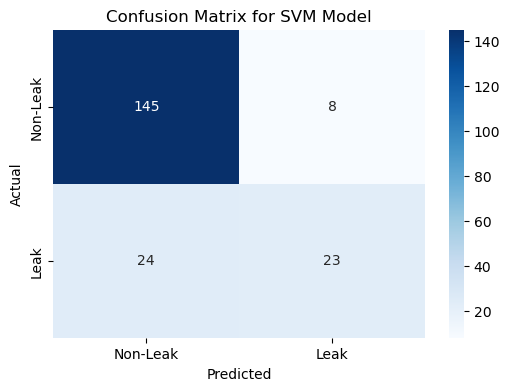

In [35]:
# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Leak', 'Leak'], yticklabels=['Non-Leak', 'Leak'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for SVM Model')
plt.show()


# Classification Report

The classification report gives precision, recall, and F1 score for each class

In [37]:
# Print classification report
print(classification_report(y_test, y_pred_svm, target_names=['Non-Leak', 'Leak']))


              precision    recall  f1-score   support

    Non-Leak       0.86      0.95      0.90       153
        Leak       0.74      0.49      0.59        47

    accuracy                           0.84       200
   macro avg       0.80      0.72      0.75       200
weighted avg       0.83      0.84      0.83       200



# Visualize the Decision Boundary (For 2D Data)

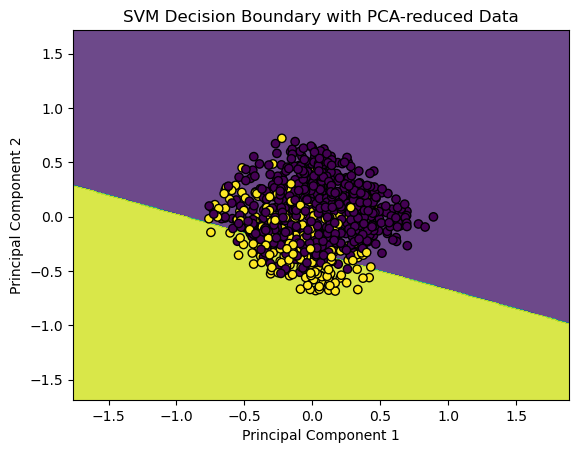

In [45]:
from sklearn.decomposition import PCA

# Reduce the dataset to 2D for visualization (if applicable)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Re-train SVM on the 2D data
svm_model.fit(X_train_pca, y_train)

# Create a mesh grid for plotting decision boundary
import numpy as np
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid points
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o')

plt.title('SVM Decision Boundary with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Tuning the SVM Hyperparameters

In [45]:
# Initialize the SVM model with different hyperparameters
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=1)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Print accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}')
print(classification_report(y_test, y_pred_svm, target_names=['Non-Leak', 'Leak']))


Accuracy: 0.95
              precision    recall  f1-score   support

    Non-Leak       0.97      0.97      0.97       153
        Leak       0.90      0.91      0.91        47

    accuracy                           0.95       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.96      0.95      0.96       200



# Learning Curve

how the model improves with increasing training data

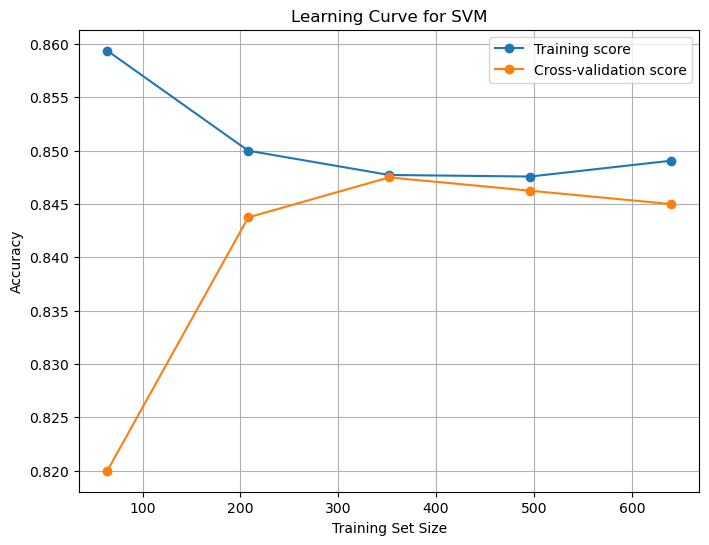

In [51]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='linear'), X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', marker='o')
plt.title('Learning Curve for SVM')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()
